In [42]:
%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
sns.set()

In [20]:
import pandas as pd
df = pd.read_csv(r"C:\Users\14802\devmtn\data15\week3\viz-exploration\data\athletes.csv")
athletes_selected_sports = df[df['sport'].isin(['wrestling', 'badminton', 'triathlon', 'gymnastics'])]

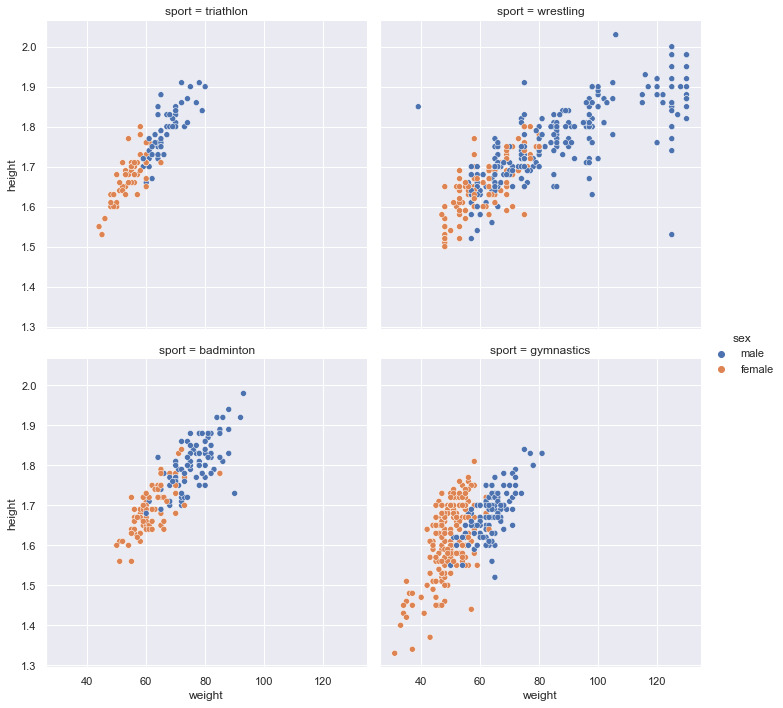

In [27]:
sns.relplot(data=athletes_selected_sports, x='weight', y='height', col='sport', col_wrap=2, hue='sex');

In [18]:
weather = pd.read_csv(r"C:\Users\14802\devmtn\data15\week3\viz-exploration\data\weather.csv")
aug = weather[weather['MONTH'] == 8]
aug.head()

,MONTH,DAY,TIME,TEMP,PRESSURE
5112,8,1,1,13.4,10178
5113,8,1,2,14.4,10176
5114,8,1,3,14.3,10174
5115,8,1,4,14.6,10172
5116,8,1,5,15.6,10172


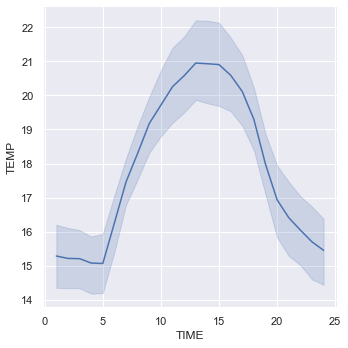

In [26]:
sns.relplot(data=aug, x='TIME', y='TEMP', kind='line');

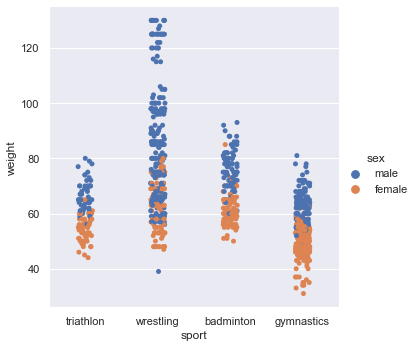

In [29]:
sns.catplot(data=athletes_selected_sports, x='sport', y='weight', hue='sex');

In [32]:
weather.head()

,MONTH,DAY,TIME,TEMP,PRESSURE
0,1,1,1,6.8,10207
1,1,1,2,5.8,10214
2,1,1,3,5.7,10220
3,1,1,4,6.0,10225
4,1,1,5,4.5,10230


In [33]:
days = weather[weather['MONTH'].isin([1,7]) & (weather['DAY'] == 1)].drop(columns='DAY')
days = days.pivot(columns='MONTH', index='TIME')
days.head()

TEMP       PRESSURE       
MONTH    1     7        1      7
TIME                            
1      6.8  16.3    10207  10100
2      5.8  16.5    10214  10099
3      5.7  16.3    10220  10098
4      6.0  16.5    10225  10096
5      4.5  16.7    10230  10098

<IPython.core.display.Javascript object>


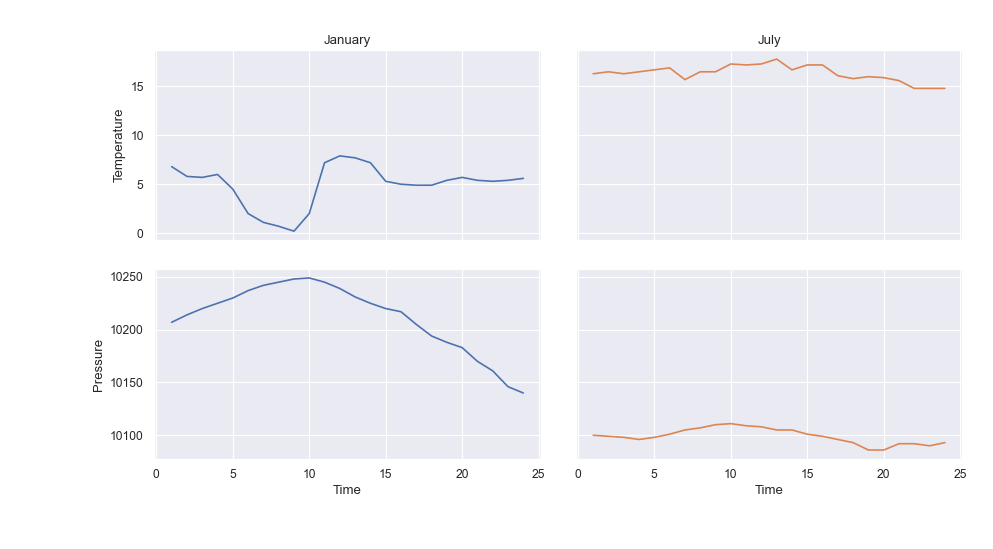

In [51]:
fig, ax = plt.subplots(2,2, sharey='row', sharex='col');
days['TEMP'].plot(subplots=True, ax=ax[0], legend=False)
days['PRESSURE'].plot(subplots=True, ax=ax[1], legend=False);

ax[0][0].set_ylabel('Temperature')
ax[0][0].set_title('January')
ax[0][1].set_title("July")
ax[1][0].set_ylabel('Pressure')
ax[1][0].set_xlabel('Time')
ax[1][1].set_xlabel('Time')

fig.tight_layout()

In [54]:
sales = pd.read_csv(r"C:\Users\14802\devmtn\data15\week3\viz-exploration\data\sales.csv", parse_dates=['Date'])
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     50 non-null     datetime64[ns]
 1   Amount   50 non-null     int64         
 2   Product  50 non-null     object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.3+ KB


In [55]:
sales.head()

,Date,Amount,Product
0,2017-01-20,5411,b
1,2017-02-22,5000,c
2,2017-03-01,7260,a
3,2017-03-14,2117,c
4,2017-04-15,7516,b


In [56]:
sales['Month'] = sales['Date'].dt.month
sales.head()

,Date,Amount,Product,Month
0,2017-01-20,5411,b,1
1,2017-02-22,5000,c,2
2,2017-03-01,7260,a,3
3,2017-03-14,2117,c,3
4,2017-04-15,7516,b,4


In [61]:
g = sales.groupby(['Month', 'Product'])['Amount'].sum()

In [62]:
g = g.unstack()
g

Product,a,b,c
Month,,,
1,7260.0,9258.0,1740.0
2,6534.0,NaN,5000.0
3,7260.0,NaN,2117.0
4,11616.0,13221.0,5440.0
5,7119.0,NaN,2990.0
6,11071.0,NaN,7176.0
7,4200.0,15973.0,2901.0
8,10342.0,NaN,6662.0
9,NaN,NaN,660.0


In [64]:
revenue = g.fillna(0).cumsum()
revenue

Product,a,b,c
Month,,,
1,7260.0,9258.0,1740.0
2,13794.0,9258.0,6740.0
3,21054.0,9258.0,8857.0
4,32670.0,22479.0,14297.0
5,39789.0,22479.0,17287.0
6,50860.0,22479.0,24463.0
7,55060.0,38452.0,27364.0
8,65402.0,38452.0,34026.0
9,65402.0,38452.0,34686.0


<IPython.core.display.Javascript object>


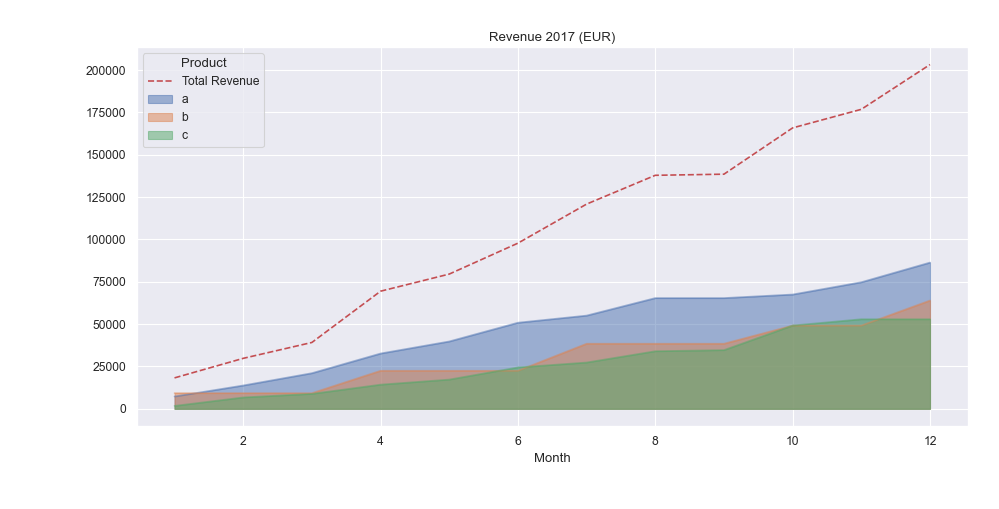

In [71]:
fig, ax = plt.subplots()

total_revenue = sales.groupby('Month')['Amount'].sum().cumsum()
total_revenue.plot(ax=ax, style='r--', legend=True, label='Total Revenue')
revenue.plot.area(title='Revenue 2017 (EUR)', ax=ax, stacked=False, grid=True)

fig.tight_layout()